<a href="https://colab.research.google.com/github/erenayar-12/DSA210-Project/blob/main/DSA210_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [3]:
from os.path import join

In [4]:
data_path = "/content/gdrive/My Drive"
filename = "final_data.csv"


In [5]:
df = pd.read_csv(join(data_path, filename), delimiter=",")

for col in ['Suicide', 'Theatre', 'Opera', 'Cinema']:
    df[col] = df[col].astype(str).str.replace(" ", "").astype(int) #in the original data, there are spaces between thousands and millions so I erased them with this code in order to calculate correctly

def interpolate_column(df, column_name, method='linear', direction='both'):
    df = df.sort_values('Year')
    df[column_name] = df[column_name].interpolate(method=method, limit_direction=direction)
    return df

df['Population'] = df['Population'].astype(str).str.replace(" ", "").astype(float) #In order to interpolate, we need population to be float type

df['Population'] = df['Population'].replace(0, np.nan) #NULL values typed as 0 at csv file, so I change them as NA of Numpy. NaN from Pandas didn't work
df = interpolate_column(df, 'Population')

#Even though trend is not strictly linear, safest option to fill NA's is linear interpolation

df['Suicide Rate'] = df['Suicide'] / df['Population'] * 100_000

df

,Year,Population,Suicide,Theatre,Opera,Cinema,Suicide Rate
23,2000,6.780393e+07,1802,3746162,258547,17086152,2.657663
22,2001,6.820140e+07,2584,2570120,207360,16905737,3.788778
21,2002,6.859888e+07,2301,2634841,165154,15406597,3.354282
20,2003,6.899635e+07,2705,2758206,273271,14503052,3.920497
19,2004,6.939383e+07,2707,2567491,457717,18670834,3.900923
18,2005,6.979130e+07,2703,2716251,252076,18001466,3.872975
17,2006,7.018878e+07,2829,2161537,245448,23512599,4.030559
16,2007,7.058626e+07,2793,2419262,451271,20659569,3.956861
15,2008,7.151710e+07,2816,3380214,325364,31132231,3.937520
14,2009,7.256131e+07,2898,4320729,181605,31334447,3.993864


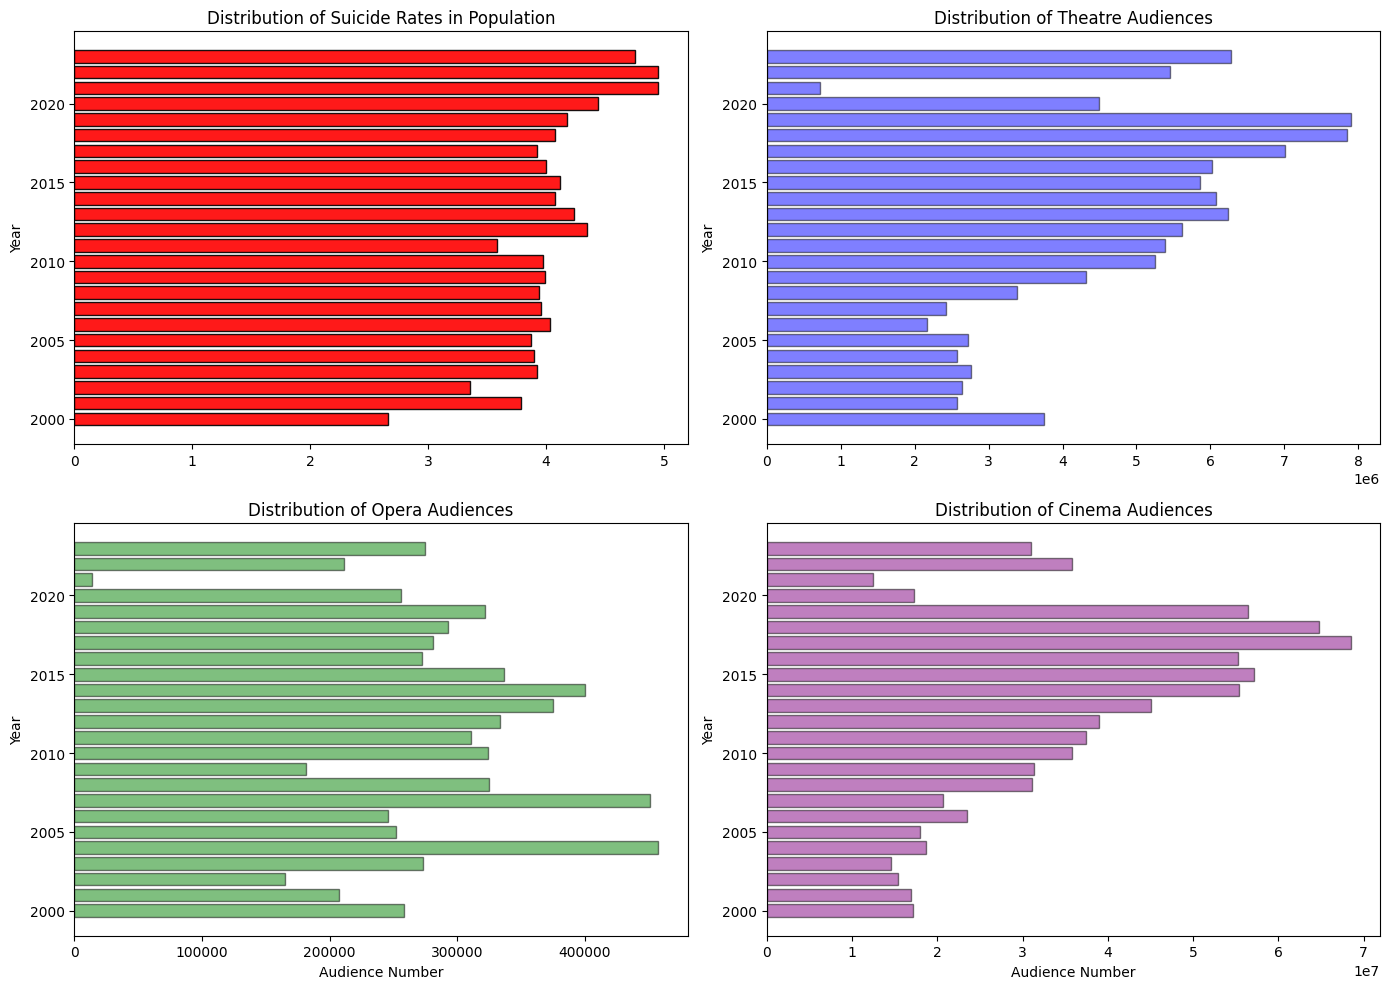

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(14,10)) #creating 2x2 area to visualize 4 different data

bins = 10

#Top left
axes[0, 0].barh(df['Year'], df["Suicide Rate"], color="red", alpha=0.9, edgecolor="black") #I've choosen a little darker color to emphasize suicide number is the main actor here
axes[0, 0].set_title("Distribution of Suicide Rates in Population")
axes[0, 0].set_ylabel("Year")

# Top right
axes[0, 1].barh(df['Year'], df["Theatre"], color="blue", alpha=0.5, edgecolor="black")
axes[0, 1].set_title("Distribution of Theatre Audiences")
axes[0, 1].set_ylabel("Year")

# Bottom left
axes[1, 0].barh(df['Year'], df["Opera"], color="green", alpha=0.5, edgecolor="black")
axes[1, 0].set_title("Distribution of Opera Audiences")
axes[1, 0].set_ylabel("Year")
axes[1, 0].set_xlabel("Audience Number")

# Bottom right
axes[1, 1].barh(df['Year'], df["Cinema"], color="purple", alpha=0.5, edgecolor="black")
axes[1, 1].set_title("Distribution of Cinema Audiences")
axes[1, 1].set_ylabel("Year")
axes[1, 1].set_xlabel("Audience Number")

plt.tight_layout()
plt.show()

HYPOTHESIS TESTING:

Null Hypothesis (H0) : There is no correlation between cultural activities and numbers of suicides.

Alternative Hypothesis (H1): There is a negative correlation between cultural activities and numbers of suicides.

Now we will check those hypothesis via Pearson Coefficients.


In [7]:
#naming the columns again so it will be easier to write Pearson codes
#Also using non_covid_df helps us to understand real relations with neglecting COVID's effects
non_covid_df = df[~df['Year'].isin([2020, 2021])]
theatre = non_covid_df['Theatre']
opera = non_covid_df['Opera']
cinema = non_covid_df['Cinema']
suicide = non_covid_df['Suicide Rate']


# calculating Perason Coefficients
r_theatre, p_value_theatre = stats.pearsonr(suicide, theatre)
r_opera, p_value_opera = stats.pearsonr(suicide, opera)
r_cinema, p_value_cinema = stats.pearsonr(suicide, cinema)

print(f"Pearson Correlation Coefficient (Theatre): {r_theatre:.4f}")
print(f"p-value (Theatre): {p_value_theatre:.4f}")
print(f"Pearson Correlation Coefficient (Opera): {r_opera:.4f}")
print(f"p-value (Opera): {p_value_opera:.4f}")
print(f"Pearson Correlation Coefficient (Cinema): {r_cinema:.4f}")
print(f"p-value (Cinema): {p_value_cinema:.4f}")

Pearson Correlation Coefficient (Theatre): 0.3997
p-value (Theatre): 0.0653
Pearson Correlation Coefficient (Opera): 0.1165
p-value (Opera): 0.6057
Pearson Correlation Coefficient (Cinema): 0.3393
p-value (Cinema): 0.1224


When we look at p-values we see that they all greater than 0.05, so we fail to reject null hypothesis.

By looking at r-values:

For Theatre, Opera and Cinema, there are weak positive correlations.

When we consider all, weak correlations may be due to other factor or by chance.


In [9]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use non-COVID years
X = non_covid_df[['Theatre', 'Opera', 'Cinema']]
y = non_covid_df['Suicide Rate']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (only for Linear Regression, optional for tree-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---------- LINEAR REGRESSION ----------
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# ---------- DECISION TREE ----------
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# ---------- RANDOM FOREST ----------
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ---------- RESULTS COMPARISON ----------
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ]
}

results_df = pd.DataFrame(results)
print(results_df)





               Model  R2 Score      RMSE
0  Linear Regression -0.444642  0.682094
1      Decision Tree  0.058540  0.550637
2      Random Forest  0.007881  0.565257


Model Comparison Table:

            Model  R² Score     RMSE
Linear Regression -0.444642 0.682094
    Decision Tree  0.058540 0.550637
    Random Forest  0.007881 0.565257


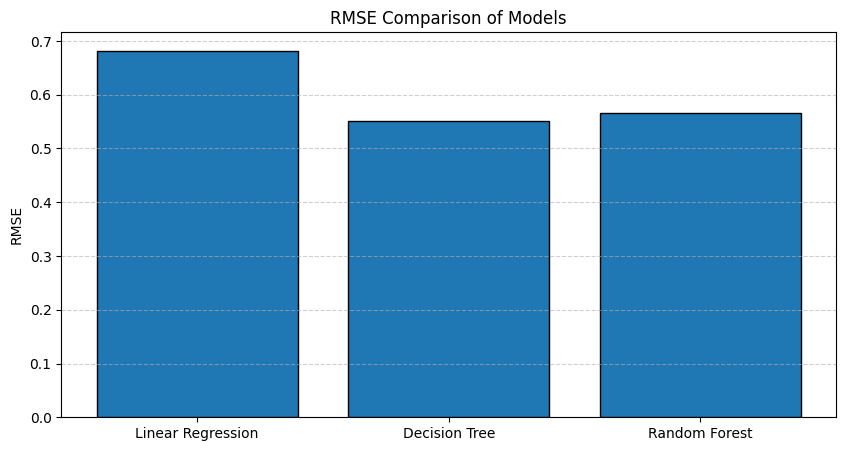

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = non_covid_df[['Theatre', 'Opera', 'Cinema']]
y = non_covid_df['Suicide Rate']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for linear regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit models
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Create results table
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "R² Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ]
}

results_df = pd.DataFrame(results)

# Print table
print("Model Comparison Table:\n")
print(results_df.to_string(index=False))

# Optional: plot results
plt.figure(figsize=(10, 5))
plt.bar(results_df["Model"], results_df["RMSE"], edgecolor='black')
plt.title("RMSE Comparison of Models")
plt.ylabel("RMSE")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Prepare your data
X = non_covid_df[['Theatre', 'Opera', 'Cinema']]
y = non_covid_df['Suicide Rate']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train tuned Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📊 Tuned Random Forest Results:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")


📊 Tuned Random Forest Results:
R² Score: 0.0219
RMSE: 0.5612
